In [1]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '0'

In [2]:
import tensorflow.keras as keras
import tensorflow as tf
import tensorflow.keras.backend as K
import matplotlib.pyplot as plt
import numpy as np

from generator import CityScapesGenerator
from model_residual import create_model
from loss import focal_loss

Using TensorFlow backend.


In [11]:
model = create_model((512, 1024, 3), width=64, depth=9)
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 512, 1024, 3 0                                            
__________________________________________________________________________________________________
conv2d_16 (Conv2D)              (None, 256, 512, 64) 1728        input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_21 (BatchNo (None, 256, 512, 64) 256         conv2d_16[0][0]                  
__________________________________________________________________________________________________
activation_21 (Activation)      (None, 256, 512, 64) 0           batch_normalization_21[0][0]     
____________________________________________________________________________________________

In [12]:
epochs = 100
bs = 4

gen_train = CityScapesGenerator('train', dir_ = 'data', batch_size=bs)
gen_val = CityScapesGenerator('val', dir_ = 'data', batch_size=bs, augment=False)

In [13]:
lr_schedule = keras.optimizers.schedules.PolynomialDecay(
    0.01, 
    len(gen_train) * epochs, 
    1e-4, 
    0.9
)

model.compile(
    optimizer=keras.optimizers.Adam(lr_schedule),
    loss=focal_loss,
)

In [ ]:
model.fit(
    gen_train,
    epochs=epochs,
    validation_data=gen_val,
)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 744 steps, validate for 125 steps
Epoch 1/100
744/744 [==============================] - 5193s 7s/step - loss: 0.0564 - val_loss: 0.0724
Epoch 2/100
744/744 [==============================] - 5180s 7s/step - loss: 0.0302 - val_loss: 0.0526
Epoch 3/100
744/744 [==============================] - 5183s 7s/step - loss: 0.0271 - val_loss: 0.0397
Epoch 4/100
744/744 [==============================] - 5186s 7s/step - loss: 0.0235 - val_loss: 0.0435
Epoch 5/100
744/744 [==============================] - 5165s 7s/step - loss: 0.0205 - val_loss: 0.0361
Epoch 6/100
744/744 [==============================] - 5169s 7s/step - loss: 0.0197 - val_loss: 0.0388
Epoch 7/100
744/744 [==============================] - 5181s 7s/step - loss: 0.0186 - val_loss: 0.0225
Epoch 8/100
744/744 [==============================] - 5182s 7s/step - loss: 0.0168 - val_loss: 0.0214
Epoch 9/100
744/744 [==============================] - 5182s 7s/step - loss: 0.016

In [ ]:
model.fit(
    gen_train,
    epochs=epochs,
    validation_data=gen_val,
    initial_epoch=63,
)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 744 steps, validate for 125 steps
Epoch 64/100
744/744 [==============================] - 5243s 7s/step - loss: 0.0074 - val_loss: 0.0136
Epoch 65/100
744/744 [==============================] - 5245s 7s/step - loss: 0.0074 - val_loss: 0.0137
Epoch 66/100
744/744 [==============================] - 5235s 7s/step - loss: 0.0071 - val_loss: 0.0117
Epoch 67/100
744/744 [==============================] - 5233s 7s/step - loss: 0.0073 - val_loss: 0.0101
Epoch 68/100
744/744 [==============================] - 5235s 7s/step - loss: 0.0071 - val_loss: 0.0133
Epoch 69/100
744/744 [==============================] - 5230s 7s/step - loss: 0.0071 - val_loss: 0.0108
Epoch 70/100
744/744 [==============================] - 5227s 7s/step - loss: 0.0070 - val_loss: 0.0113
Epoch 71/100
744/744 [==============================] - 5229s 7s/step - loss: 0.0071 - val_loss: 0.0115
Epoch 72/100
370/744 [=============>................] - ETA: 42:44 - loss:

In [24]:
model.save_weights('temp1.h5')

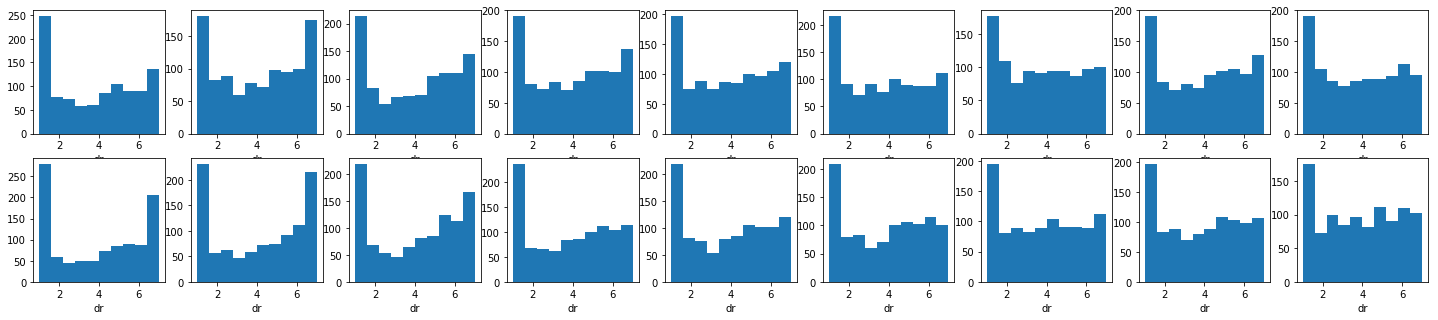

In [17]:
# plot dilation rate histograms
fig, axs = plt.subplots(2, 9, figsize=(25, 5))
plt.xlabel('dr')
axs1 = iter(axs[0])
axs2 = iter(axs[1])
for layer in model.layers:
    weights = layer.get_weights()
    if len(weights) == 4 and not isinstance(layer, keras.layers.BatchNormalization):
        ax = next(axs1)
        ax.hist(weights[2].flatten())
        ax.set_xlabel('dr')
        ax = next(axs2)
        ax.hist(weights[3].flatten())
        ax.set_xlabel('dr')


In [11]:
import matplotlib.pyplot as plt

pred = model.predict(gen_train[0][0])

plt.imshow(pred[0, ..., 1])
plt.colorbar()

In [ ]:
# TODO: Add SRIP regularization to 1x1 convs. 

In [6]:
bs = 4

gen_train = CityScapesGenerator('train', dir_ = 'data', batch_size=bs)
gen_val = CityScapesGenerator('val', dir_ = 'data', batch_size=bs)

In [18]:
x, y = gen_train[0]

for lr in np.logspace(-3, 0, 240):
    K.set_value(model.optimizer.lr, lr)
    loss = model.train_on_batch(x, y)
    print(f'{lr:.3g}\t{loss:.3g}')


0.001	0.193
0.00103	0.0554
0.00106	0.0605
0.00109	0.0493
0.00112	0.036
0.00116	0.0228
0.00119	0.0149
0.00122	0.0108
0.00126	0.0087
0.0013	0.00777
0.00134	0.00698
0.00137	0.00626
0.00141	0.00584
0.00146	0.00529
0.0015	0.00483
0.00154	0.00456
0.00159	0.00426
0.00163	0.00403
0.00168	0.00371
0.00173	0.00344
0.00178	0.00325
0.00183	0.00305
0.00189	0.0029
0.00194	0.00277
0.002	0.00258
0.00206	0.00242
0.00212	0.00231
0.00218	0.00219
0.00225	0.00207
0.00231	0.00194
0.00238	0.00182
0.00245	0.00172
0.00252	0.00168
0.0026	0.00173
0.00267	0.00168
0.00275	0.00166
0.00283	0.00156
0.00291	0.00155
0.003	0.00163
0.00309	0.00267
0.00318	0.00354
0.00327	0.00281
0.00337	0.00255
0.00347	0.00231
0.00357	0.00238
0.00367	0.00213
0.00378	0.00211
0.00389	0.00188
0.004	0.00183
0.00412	0.00162
0.00424	0.00166
0.00437	0.00148
0.00449	0.00163
0.00463	0.00159
0.00476	0.00164
0.0049	0.00149
0.00505	0.00152
0.00519	0.00138
0.00535	0.00126
0.0055	0.00127
0.00566	0.00124
0.00583	0.00113
0.006	0.00115
0.00618	0.00109
0.0

KeyboardInterrupt: 